Nama: Mouriverd Laurent<br>
Intern Data Science **ID/X Partners** May '24<br>
Judul: **Membuat model Machine Learning untuk memprediksi Resiko Pinjaman Kredit**

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import dataset**

In [3]:
#Import Dataset & Show 5 baris pertama
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Data Science Rakamin/Final Task/loan_data_2007_2014.csv')
df.sample(5)

<ipython-input-3-a45944b33c24>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intern Data Science Rakamin/Final Task/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
11071,11071,821787,1030172,7800,7800,7800.0,36 months,11.99,259.04,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306695,306695,27700869,30213965,14000,14000,14000.0,36 months,8.39,441.24,A,...,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN
266264,266264,32179067,34792301,24650,24650,24650.0,60 months,16.99,612.49,D,...,NaN,NaN,NaN,NaN,NaN,NaN,29400.0,NaN,NaN,NaN
221984,221984,1210846,1452014,6400,6400,6400.0,36 months,9.76,205.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44092,44092,8625002,10397121,5600,5600,5600.0,36 months,13.53,190.12,B,...,NaN,NaN,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,NaN


## **Data Understanding**

In [4]:
#Melihat Jumlah baris dan kolom
df.shape

(466285, 75)

Dataset ini memiliki 466285 baris dan 75 Kolom

In [5]:
#Melihat struktur & Type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
#Melihat Jumlah kolom type Numerik
df.select_dtypes(include=['number']).shape[1]

53

In [7]:
#Melihat Jumlah kolom type Kategorik
df.select_dtypes(include=['object']).shape[1]

22

Dataset memiliki type data kolom: 53 Numerik dan 22 kategorik

In [8]:
#menampilkan summary statistik numerikal
numerical_summary = df.describe()
print(numerical_summary)

          Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000    

In [9]:
# Menampilkan summary statistik kategorik
categorical_summary = df.describe(include=['object'])
print(categorical_summary)


              term   grade sub_grade emp_title emp_length home_ownership  \
count       466285  466285    466285    438697     445277         466285   
unique           2       7        35    205475         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        337953  136929     31686      5399     150049         235875   

       verification_status issue_d loan_status pymnt_plan  ...  \
count               466285  466285      466285     466285  ...   
unique                   3      91           9          2  ...   
top               Verified  Oct-14     Current          n  ...   
freq                168055   38782      224226     466276  ...   

                   purpose               title zip_code addr_state  \
count               466285              466264   466285     466285   
unique                  14               63098      888         50   
top     debt_consolidation  Debt consolidation    945xx         CA   
freq    

Kesimpulan dari summary statisik:
* Rata-rata jumlah pinjaman (loan_amnt) adalah $14,317,dengan standar deviasi
 $8,287.<br>
* Rata-rata suku bunga (int_rate) adalah 13.83%, dengan standar deviasi 4.36% <br>
* Rata-rata cicilan bulanan (installment) adalah $432, dengan standar deviasi $243.<br>
* Rata-rata pendapatan tahunan peminjam (annual_inc) adalah $73,277, dengan standar deviasi $54,963.<br>
* Beberapa kolom seperti total_bal_il, il_util, open_rv_12m, dan lainnya memiliki nilai nol atau NaN di seluruh data yang mungkin tidak relevan untuk analisis.<br>
* Terdapat 2 jenis Term (Jangka Waktu Pinjaman): 36 bulan dan 60 bulan.<br>
* Terdapat 7 kelas pinjaman Grade (Kelas Pinjaman), dengan kelas B sebagai yang terbanyak <br>
* Terdapat 14 Purpose (Tujuan Pinjaman), dengan "debt_consolidation" sebagai yang terbanyak.<br>
* Terdapat 9 Loan_status (Status Pinjaman), dengan "Current" sebagai yang terbanyak.<br>



# **Exploratory Data  Analysis (EDA)**

## **Data Cleaning**

Handle Missing Value dan Duplikasi Data

In [10]:
#Melihat duplikat data
df.duplicated().sum()

0

Tidak di temukan adanya duplikasi data

In [11]:
# Mengatur agar semua kolom ditampilkan
pd.set_option('display.max_rows', None)

# Menampilkan missing values perkolom
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

Ditemukan ada beberapa kolom yang semua barisnya mengandung missing value, selanjutnya kolom tersebut akan di drop karena tidak memiliki informasi apapun.

In [12]:
# Drop kolom dengan missing value > 40%
threshold = 40
cols_to_drop = missing_values[missing_values > threshold].index
df.drop(cols_to_drop, axis=1, inplace=True)

In [13]:
# Menampilkan kolom-kolom yang di-drop
print(f"Kolom-kolom yang di-drop (missing value > {threshold}%):")
print(cols_to_drop)

Kolom-kolom yang di-drop (missing value > 40%):
Index(['emp_title', 'emp_length', 'desc', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')


In [14]:
# Menampilkan jumlah kolom yang di-drop
print(len(cols_to_drop))

31


Total Jumlah kolom yang di drop due to missing value >40% adalah 31 kolom.

In [15]:
# Hitung dan tampilkan persentase missing value setiap kolom
missing_values = df.isnull().mean() * 100
print(missing_values)

Unnamed: 0                 0.000000
id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
home_ownership             0.000000
annual_inc                 0.000858
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
url                        0.000000
purpose                    0.000000
title                      0.004504
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.006219
earliest_cr_line           0.006219
inq_last_6mths             0.006219
open_acc                   0.006219
pub_rec                    0

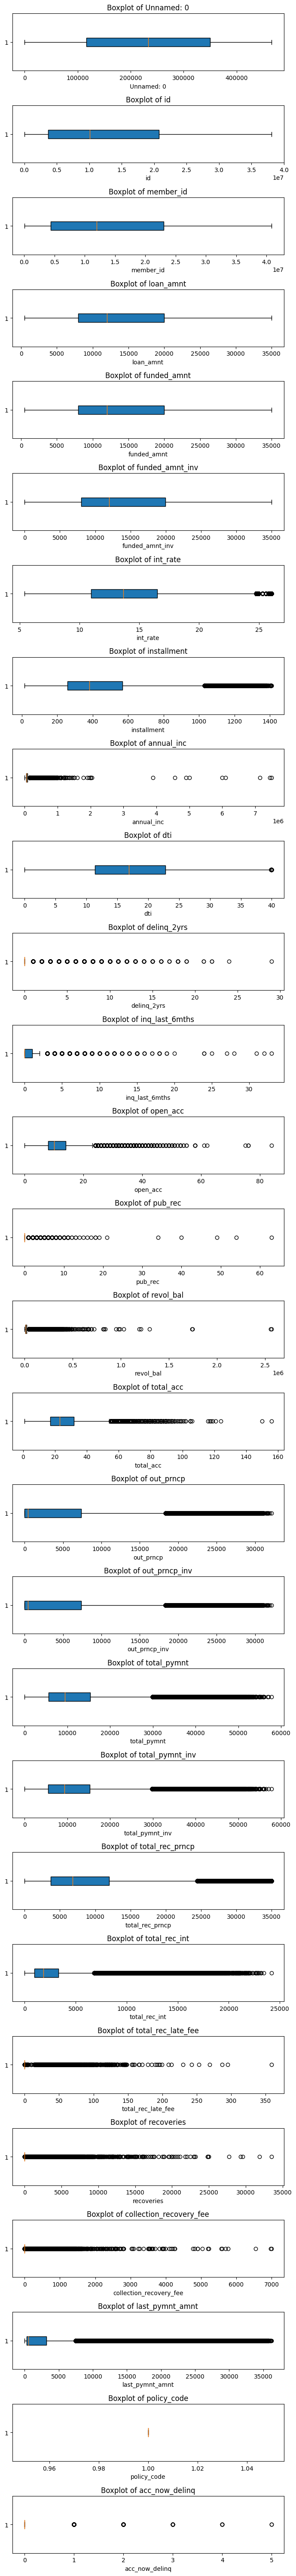

In [16]:
# Membuat boxplot setiap kolom numerik untuk melihat outlier.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(7, 60))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Dikarenakan adanya outlier, maka untuk handle missing value dengan imputasi kolom dengan type data numerik dengan menggunakan data median.

In [17]:
# Imputasi kolom numerik dengan median dan kolom kategorik dengan modus
from sklearn.impute import SimpleImputer

# Imputasi untuk kolom numerik
imputer_numerik = SimpleImputer(strategy='median')
kolom_numerik = df.select_dtypes(include=['number']).columns
df[kolom_numerik] = imputer_numerik.fit_transform(df[kolom_numerik])

# Imputasi untuk kolom kategorikal
imputer_kategorik = SimpleImputer(strategy='most_frequent')
kolom_kategorik = df.select_dtypes(include=['object']).columns
df[kolom_kategorik] = imputer_kategorik.fit_transform(df[kolom_kategorik])

In [18]:
#Check missing value setelah dilakukan imputasi.
missing_values_after = df.isnull().sum()
print(missing_values_after)

Unnamed: 0                 0
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [19]:
#Melihat Jumlah baris dan kolom
df.shape

(466285, 44)

# Labeling

In [20]:
#melihat unique value loan_status
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Berdasarkan kolom "loan_status" dapat di tentukan status pinjaman yaitu:<br>
Kategory "GOOD":<br>
*   Current: Peminjam saat ini sedang membayar pinjamannya sesuai jadwal.<br>
*   Fully Paid: Peminjam telah melunasi pinjamannya sepenuhnya.<br>
*   Does not meet the credit policy. Status Paid: Peminjam telah melunasi pinjaman meskipun tidak memenuhi kebijakan kredit.<br>

Kategory "BAD":<br>
*   Charged Off: Pinjaman dianggap tidak dapat ditagih.<br>
*   Late (31-120 days): Pinjaman tertunggak selama 31-120 hari.<br>
*   In Grace Period: Pinjaman dalam masa tenggang pembayaran.<br>
*   Late (16-30 days): Pinjaman tertunggak selama 16-30 hari.<br>
*   Default: Pinjaman dalam status gagal bayar.<br>
*   Does not meet the credit policy. Status Off: Pinjaman dianggap tidak dapat ditagih meskipun tidak memenuhi kebijakan kredit.<br>













In [21]:
# Menambahkan kolom baru 'loan_status_label' dengan label 'GOOD' atau 'BAD'
df['loan_status_label'] = df['loan_status'].apply(lambda x: 'GOOD' if x in ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'] else 'BAD')

# Menampilkan beberapa baris dari dataset untuk memastikan label telah ditambahkan
print(df[['loan_status', 'loan_status_label']].head(10))


   loan_status loan_status_label
0   Fully Paid              GOOD
1  Charged Off               BAD
2   Fully Paid              GOOD
3   Fully Paid              GOOD
4      Current              GOOD
5   Fully Paid              GOOD
6      Current              GOOD
7   Fully Paid              GOOD
8  Charged Off               BAD
9  Charged Off               BAD


# **Visualisasi**

mengeksplor berbagai plot untuk menemukan pola-pola menarik yang terkait dengan profil risiko dan kemampuan pelunasan peminjam

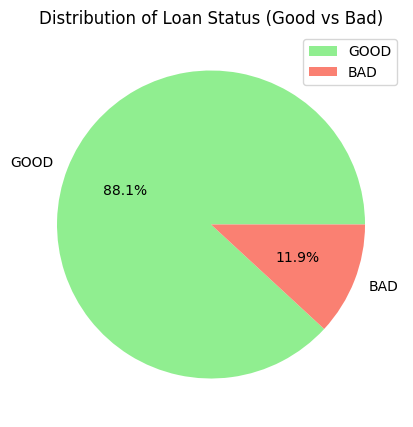

In [22]:
# Menghitung distribusi "GOOD" dan "BAD" dari kolom loan_status_label
loan_status_label_counts = df['loan_status_label'].value_counts()

# Plot distribusi Loan Status
plt.figure(figsize=(5, 5))
loan_status_label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Distribution of Loan Status (Good vs Bad)')
plt.ylabel('')  # Hide the y-label
plt.legend(labels=loan_status_label_counts.index, loc="best")
plt.show()

Loan status memperlihatkan distribusi data yang imbalance. Untuk menghandle data imbalance perlu di lakukan oversampling dengan Teknik SMOTE.

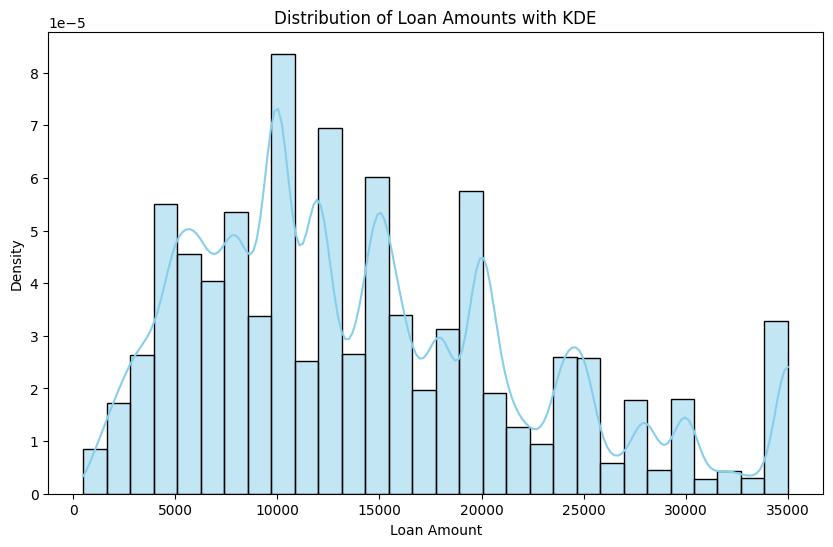

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Plotting the distribution of loan amounts with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='skyblue', edgecolor='k', stat="density")

plt.title('Distribution of Loan Amounts with KDE')
plt.xlabel('Loan Amount')
plt.ylabel('Density')

plt.show()


Distribusi Loan Amount atau jumlah pinjaman memperlihatkan Skew positif, arti nya distribusi jumlah pinjaman tidak simetris dan banyak pinjaman berada di kisaran jumlah kecil atau sedang, dan terbanyak di rentang 10.000$ - 15.000$.<br>
Dikarenakan distribusi data yang tidak simetris, maka di dalam menghandle missing value akan di replace dengan Median.

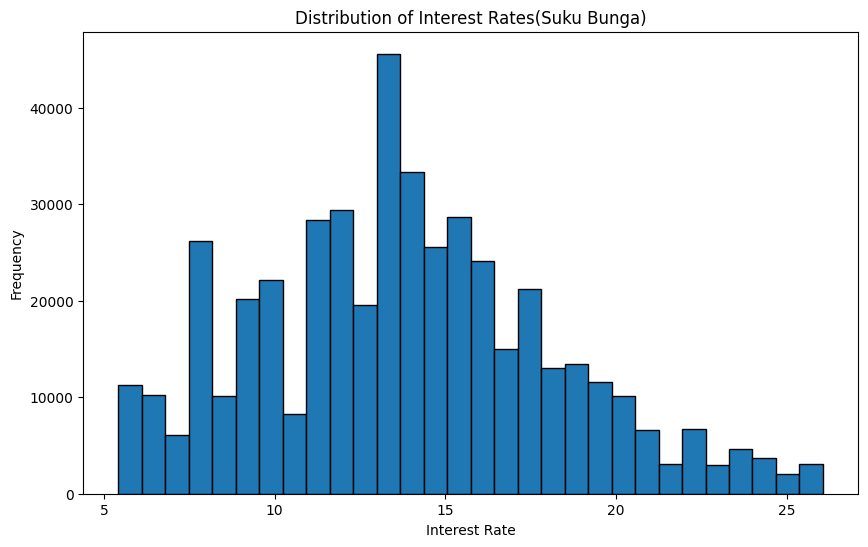

In [24]:
 # Plotting the distribution of interest rates
plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=30, edgecolor='k')
plt.title('Distribution of Interest Rates(Suku Bunga)')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

Suku bunga yang paling umum diberikan kepada peminjam adalah antara 10% sampai 15%. Dan sedikit yang tertarik dengan pinjaman dengan suku bunga tinggi.

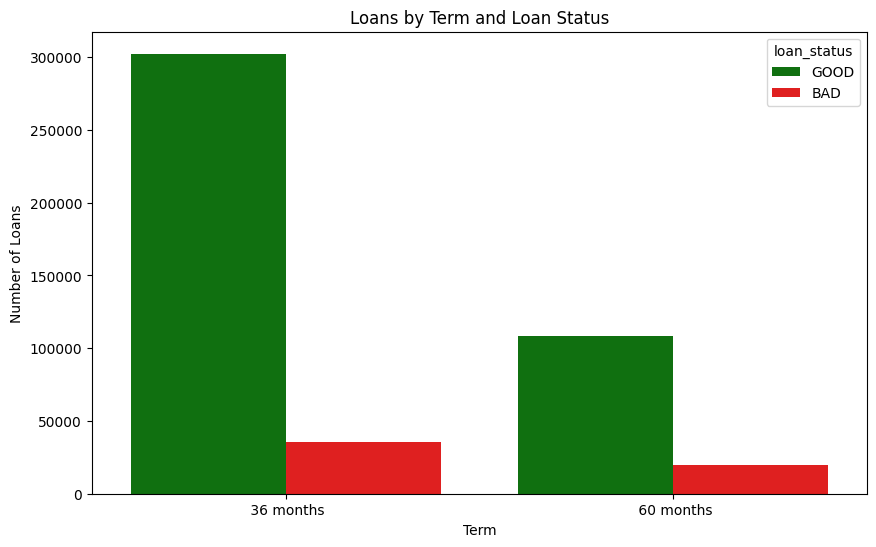

In [25]:
# Plotting the count of loans by Term and loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='term', hue='loan_status_label', palette=['green', 'red'])
plt.title('Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.legend(title='loan_status')
plt.show()

*   Sebagian besar peminjam lebih memilih jangka waktu yang lebih pendek, yaitu 36 bulan, menunjukkan bahwa peminjam merasa lebih mampu melunasi pinjaman dalam jangka waktu yang lebih pendek.
*   Mayoritas pinjaman baik yang berjangka waktu 36 months maupun 60 months berstatus Good, menunjukkan bahwa kebanyakan pinjaman berhasil dilunasi oleh peminjam.<br>

<Figure size 1000x600 with 0 Axes>

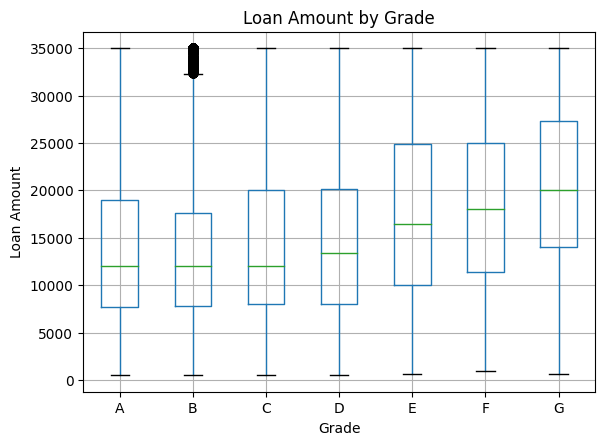

In [26]:
# Box plot of loan amount by grade
plt.figure(figsize=(10, 6))
df.boxplot(column='loan_amnt', by='grade')
plt.title('Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.suptitle('')
plt.show()

*   Grade biasanya menunjukkan tingkat risiko peminjam, dari yang paling rendah adalah A hingga yang paling tinggi adalah G.<br>
*   Semakin besar jumlah pinjaman, maka akan semakin besar pula grade/resiko nya. namun ada anomali/outlayers pinjaman sangat besar, namun dengan Grade/ tingkat resiko yang lebih kecil yaitu pada Grade B.<br>

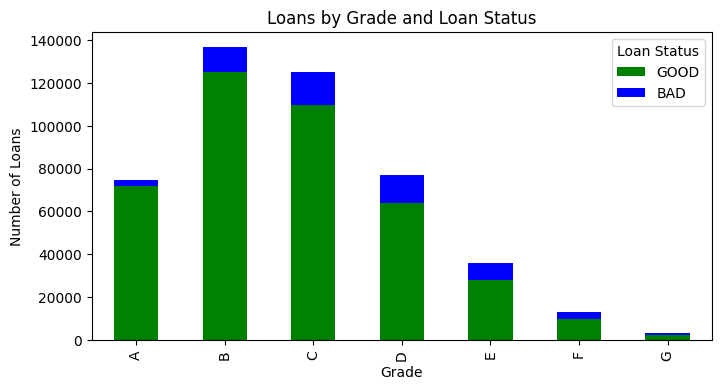

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Misalnya, kita punya DataFrame df dengan kolom 'grade' dan 'loan_status_label'
# df = pd.read_csv('your_data_file.csv')  # Baca data dari file

# Mengurutkan grade dari A ke G
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df['grade'] = pd.Categorical(df['grade'], categories=grade_order, ordered=True)

# Mengelompokkan data dan menghitung jumlah pinjaman berdasarkan grade dan status pinjaman
loan_counts = df.groupby(['grade', 'loan_status_label']).size().unstack(fill_value=0)

# Mengurutkan kolom agar 'bad' ada di atas
if 'bad' in loan_counts.columns:
    loan_counts = loan_counts[['good', 'bad']]
else:
    loan_counts = loan_counts[loan_counts.columns[::-1]]

# Plotting the stacked bar chart
loan_counts.plot(kind='bar', stacked=True, color=['green', 'blue'], figsize=(8, 4))

plt.title('Loans by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()


<Figure size 1000x600 with 0 Axes>

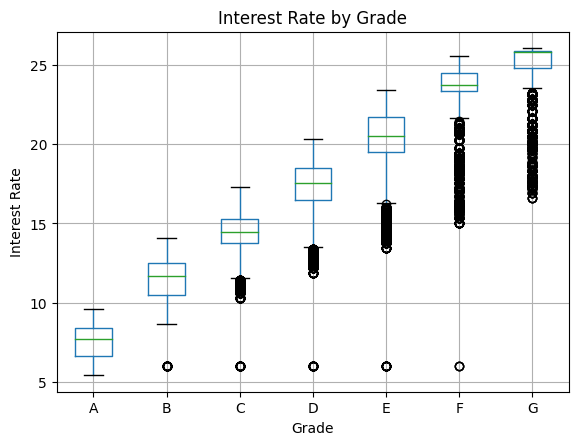

In [28]:
# Box plot of interest rate by grade
plt.figure(figsize=(10, 6))
df.boxplot(column='int_rate', by='grade')
plt.title('Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.suptitle('')
plt.show()

Suku bunga meningkat secara konsisten dari grade A ke grade G. Ini menunjukkan bahwa peminjam dengan risiko lebih tinggi dikenakan suku bunga yang lebih tinggi sebagai kompensasi atas risiko tambahan.

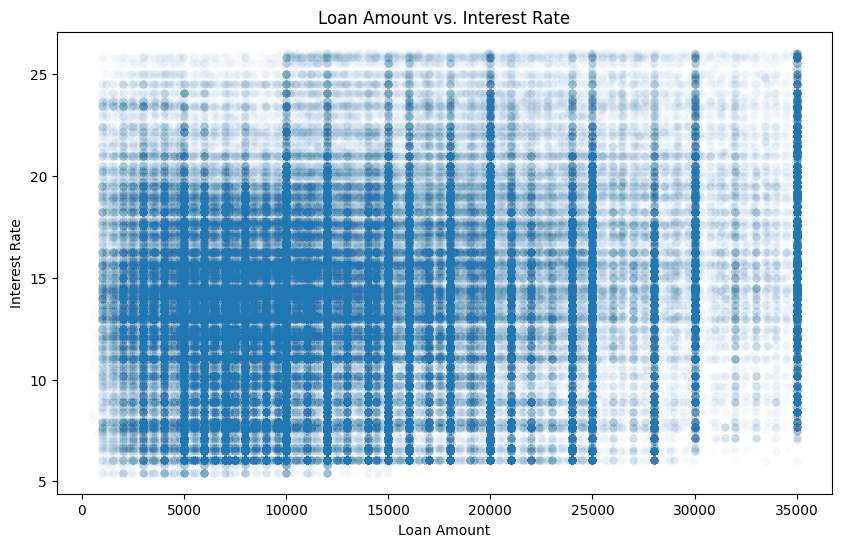

In [29]:
# Plotting loan amount vs interest rate
plt.figure(figsize=(10, 6))
plt.scatter(df['loan_amnt'], df['int_rate'], alpha=0.01, edgecolor='k', linewidth=0.01)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

Sebagian besar pinjaman berada di kisaran 5,000 hingga 20,000 dolar dengan suku bunga antara 10% hingga 20%.

# **Feature Engineering**

Drop Kolom atau fitur yang tidak di perlukan & Konversi data Kategorik to Numerik

In [30]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'id', 'member_id', 'url', 'title', 'zip_code', 'addr_state',
    'funded_amnt','funded_amnt_inv','sub_grade','issue_d','loan_status','earliest_cr_line','inq_last_6mths','initial_list_status',
    'Unnamed: 0', 'pymnt_plan', 'application_type', 'policy_code', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv'
]
# Menghapus kolom-kolom yang tidak diperlukan
df = df.drop(columns=columns_to_drop)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   loan_amnt                466285 non-null  float64 
 1   term                     466285 non-null  object  
 2   int_rate                 466285 non-null  float64 
 3   installment              466285 non-null  float64 
 4   grade                    466285 non-null  category
 5   home_ownership           466285 non-null  object  
 6   annual_inc               466285 non-null  float64 
 7   verification_status      466285 non-null  object  
 8   purpose                  466285 non-null  object  
 9   dti                      466285 non-null  float64 
 10  delinq_2yrs              466285 non-null  float64 
 11  open_acc                 466285 non-null  float64 
 12  pub_rec                  466285 non-null  float64 
 13  revol_bal                466285 non-null  fl

In [32]:
# Konversi kolom kategori ke numerik
df['term'] = df['term'].apply(lambda x: int(x.strip().split(' ')[0]))
df['grade'] = df['grade'].astype('category').cat.codes
df['home_ownership'] = df['home_ownership'].astype('category').cat.codes
df['verification_status'] = df['verification_status'].astype('category').cat.codes
df['purpose'] = df['purpose'].astype('category').cat.codes

# **Label Encoding**

In [33]:
# Labeling kolom loan_status_label
df['loan_status_encoded'] = df['loan_status_label'].map({'BAD':1,'GOOD' :0})

# Daftar kolom yang sudah di encode akan didrop
columns_to_drop = [
    'loan_status_label'
]
# drop kolom-kolom yang sudah di encode.
df = df.drop(columns=columns_to_drop)

In [34]:
#hasil dataframe setealh di lakukan data cleaning dan feature engineering
df.head(10)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_int,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,loan_status_encoded
0,5000.0,36,10.65,162.87,1,5,24000.0,2,1,27.65,...,3.0,0.0,13648.0,9.0,5861.071414,861.07,0.00,171.62,0.0,0
1,2500.0,60,15.27,59.83,2,5,30000.0,1,0,1.00,...,3.0,0.0,1687.0,4.0,1008.710000,435.17,1.11,119.66,0.0,1
2,2400.0,36,15.96,84.33,2,5,12252.0,0,11,8.72,...,2.0,0.0,2956.0,10.0,3003.653644,603.65,0.00,649.91,0.0,0
3,10000.0,36,13.49,339.31,2,5,49200.0,1,9,20.00,...,10.0,0.0,5598.0,37.0,12226.302210,2209.33,0.00,357.48,0.0,0
4,3000.0,60,12.69,67.79,1,5,80000.0,1,9,17.94,...,15.0,0.0,27783.0,38.0,3242.170000,1009.07,0.00,67.79,0.0,0
5,5000.0,36,7.90,156.46,0,5,36000.0,1,13,11.20,...,9.0,0.0,7963.0,12.0,5631.377753,631.38,0.00,161.03,0.0,0
6,7000.0,60,15.96,170.08,2,5,47004.0,0,2,23.51,...,7.0,0.0,17726.0,11.0,8136.840000,3025.99,0.00,170.08,0.0,0
7,3000.0,36,18.64,109.43,4,5,48000.0,1,0,5.35,...,4.0,0.0,8221.0,4.0,3938.144334,938.14,0.00,111.34,0.0,0
8,5600.0,60,21.28,152.39,5,4,40000.0,1,11,5.55,...,11.0,0.0,5210.0,13.0,646.020000,294.94,2.09,152.39,0.0,1
9,5375.0,60,12.69,121.45,1,5,15000.0,2,9,18.08,...,2.0,0.0,9279.0,3.0,1476.190000,533.42,2.52,121.45,0.0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  float64
 1   term                     466285 non-null  int64  
 2   int_rate                 466285 non-null  float64
 3   installment              466285 non-null  float64
 4   grade                    466285 non-null  int8   
 5   home_ownership           466285 non-null  int8   
 6   annual_inc               466285 non-null  float64
 7   verification_status      466285 non-null  int8   
 8   purpose                  466285 non-null  int8   
 9   dti                      466285 non-null  float64
 10  delinq_2yrs              466285 non-null  float64
 11  open_acc                 466285 non-null  float64
 12  pub_rec                  466285 non-null  float64
 13  revol_bal                466285 non-null  float64
 14  tota

In [36]:
df.shape

(466285, 21)

# Data Splitting for Features and Target Variable

In [47]:
# Memisahkan fitur dan target
X = df.drop(columns=['loan_status_encoded'])
y = df['loan_status_encoded']

# Dataset Splitting into Training and Testing Sets + Feature Scaling

In [48]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split #Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Feature Scaling dengan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

Didalam pemodelan kali ini akan coba dilatih 2 model machine learning, yaitu Logistic regression dan random forest.

**Logistic Regression**

In [40]:
# Melatih model Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
# Memprediksi pada test set
y_pred = model.predict(X_test)

In [42]:
# Evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [43]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9327771641807049
Confusion Matrix:
 [[81983   194]
 [ 6075  5005]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     82177
           1       0.96      0.45      0.61     11080

    accuracy                           0.93     93257
   macro avg       0.95      0.72      0.79     93257
weighted avg       0.93      0.93      0.92     93257



AUC-ROC Score

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probabilities = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.9101923496209577


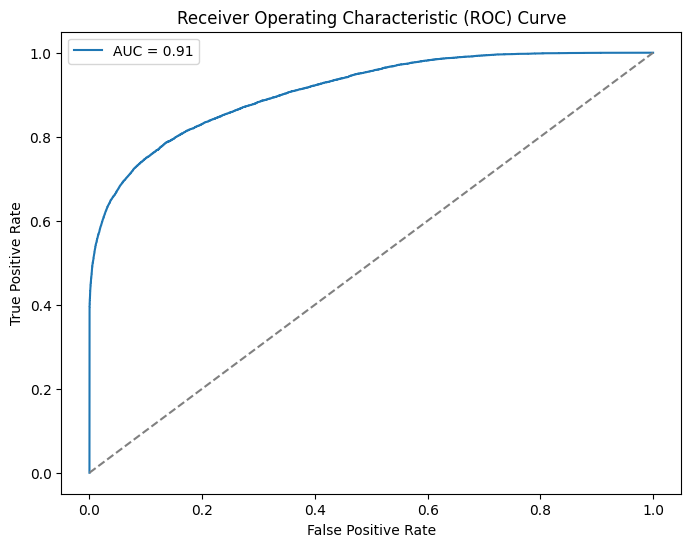

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

AUC = 0.91: Ini berarti bahwa ada 91% kemungkinan bahwa dengan model Logistic regression emprediksi skor risiko yang lebih tinggi untuk peminjam yang sebenarnya default (gagal bayar) dibandingkan dengan peminjam yang tidak default.

In [46]:
# Mendapatkan koefisien dan fitur
coefficients = model.coef_[0]
features = X.columns

In [47]:
# Menggabungkan fitur dan koefisien dalam DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

In [48]:
# Menampilkan koefisien fitur
print(coef_df)

                    Feature  Coefficient
0                 loan_amnt    -0.835053
1                      term     0.044942
2                  int_rate     1.131481
3               installment     2.224041
4                     grade    -0.818966
5            home_ownership     0.043964
6                annual_inc    -0.206992
7       verification_status     0.092476
8                   purpose     0.016587
9                       dti    -0.066639
10              delinq_2yrs    -0.047682
11                 open_acc    -0.031522
12                  pub_rec    -0.118420
13                revol_bal    -0.039263
14                total_acc     0.078275
15              total_pymnt    -2.976626
16            total_rec_int     0.397569
17  collection_recovery_fee    58.174117
18          last_pymnt_amnt    -3.231817
19           acc_now_delinq    -0.036786


Koefisien yang tinggi untuk collection recovery fee dan installment menunjukkan bahwa perubahan dalam variabel ini memiliki dampak yang signifikan pada target. Hal ini dapat dimengerti karena kedua variabel tersebut berkaitan langsung dengan jumlah uang yang harus dibayar oleh peminjam, baik sebagai biaya tambahan akibat gagal bayar (collection recovery fee) maupun sebagai komponen utama dari pembayaran pinjaman (installment). Oleh karena itu, fluktuasi dalam variabel-variabel ini akan secara langsung mempengaruhi nilai target dalam model.

**Random Forest**

In [40]:
#Inisialisasi model Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)# Prediksi pada set pengujian

In [42]:
# Cross-validation score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score #Model Evaluation dengan cross-validasi
cv_score = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Score:", np.mean(cv_score))

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report for Random Forest:\n", class_report)

Cross-Validation Score: 0.9560461961578908
Accuracy: 0.9562713790921861
Confusion Matrix:
 [[82100    77]
 [ 4001  7079]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     82177
           1       0.99      0.64      0.78     11080

    accuracy                           0.96     93257
   macro avg       0.97      0.82      0.88     93257
weighted avg       0.96      0.96      0.95     93257



**AUC-ROC Score**

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probabilities = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.9426015184534535


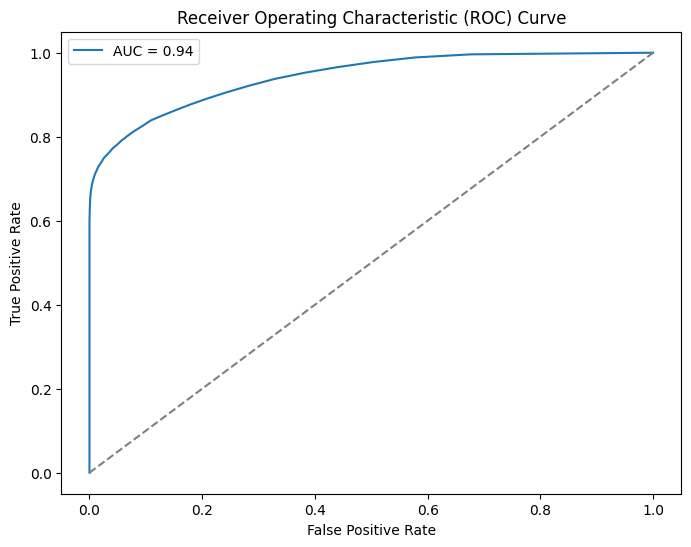

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

AUC = 0.94: Ini berarti bahwa ada 94% kemungkinan bahwa dengan model Randomforest emprediksi skor risiko yang lebih tinggi untuk peminjam yang sebenarnya default (gagal bayar) dibandingkan dengan peminjam yang tidak default.

# **Try SMOTE**

**SMOTE terhadap keseluruhan data**

In [50]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk oversampling pada keseluruhan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scaling pada keseluruhan data yang telah di-resampling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Membagi data yang telah di-resampling dan di-scaling menjadi train dan test
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

Logistic Regration (SMOTE data keseluruhan)

In [ ]:
# Melatih model
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi dan mengevaluasi model
y_test_resampled_pred = model.predict(X_test_resampled)
print("Classification Report for SMOTE on Entire Data:")
print(classification_report(y_test_resampled, y_test_resampled_pred))

Classification Report for SMOTE on Entire Data:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89    123286
           1       0.90      0.86      0.88    123286

    accuracy                           0.88    246572
   macro avg       0.88      0.88      0.88    246572
weighted avg       0.88      0.88      0.88    246572



Random Forest (SMOTE data keseluruhan)

In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [52]:
# Memprediksi dan mengevaluasi model
y_test_resampled_pred = model.predict(X_test_resampled)
print("Classification Report for SMOTE on Entire Data with Random Forest:")
print(classification_report(y_test_resampled, y_test_resampled_pred))

Classification Report for SMOTE on Entire Data with Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    123286
           1       1.00      0.94      0.97    123286

    accuracy                           0.97    246572
   macro avg       0.97      0.97      0.97    246572
weighted avg       0.97      0.97      0.97    246572



**SMOTE pada data Train**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

Logistic Regration (SMOTE pada data Train)

In [ ]:
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_resampled)
y_test_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     82177
           1       0.42      0.79      0.55     11080

    accuracy                           0.84     93257
   macro avg       0.69      0.82      0.73     93257
weighted avg       0.90      0.84      0.86     93257



Random Forest (SMOTE pada data Train)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_resampled)
y_test_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     82177
           1       0.91      0.69      0.78     11080

    accuracy                           0.95     93257
   macro avg       0.94      0.84      0.88     93257
weighted avg       0.95      0.95      0.95     93257



## **Penilaian Resiko Kredit**

# **Penilaian Resiko Kredit dengan Logistic Regression**

In [ ]:
#Inisialisasi model LogisticRegression
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Prediksi probabilitas pada data baru (X_test)
predictions = model.predict_proba(X_test)[:, 1]

In [ ]:
# Menambahkan kolom skor risiko pada dataset
X_test = pd.DataFrame(X_test)
X_test['risk_score'] = predictions

In [ ]:
# Menampilkan data yang sudah diprioritaskan
print(X_test.head())

          0         1         2         3         4         5         6  \
0  2.193827  1.623401  0.266987  1.399997  0.138807 -0.976953 -0.153171   
1 -0.400392  1.623401  1.644984 -0.552510  1.654577 -0.976953 -0.246299   
2  1.892174 -0.615991  0.188901  2.475133  0.138807 -0.976953  1.895652   
3  0.009856  1.623401  0.152154 -0.383286  0.138807 -0.976953 -0.134545   
4  0.082253 -0.615991 -1.131679  0.181590 -1.376964 -0.976953  0.219342   

          7         8         9  ...        11        12        13        14  \
0  1.164279  0.556644 -1.007141  ... -0.840034 -0.314221 -0.725656 -0.436501   
1  1.164279 -0.687906  0.888175  ...  1.367296 -0.314221 -0.149548  1.546564   
2  1.164279 -0.273056 -0.494756  ... -0.438701 -0.314221 -0.691924  1.115463   
3 -0.051598 -0.273056  0.059691  ...  0.163298 -0.314221 -0.158488  0.511922   
4  1.164279 -0.273056 -1.137149  ... -0.840034 -0.314221 -0.498808 -0.436501   

         15        16        17        18        19    risk_score  


In [ ]:
# Mengelompokkan peminjam berdasarkan skor risiko
def risk_category(score):
    if score < 0.2:
        return 'Low Risk'
    elif 0.2 <= score < 0.5:
        return 'Medium Risk'
    else:
        return 'High Risk'

X_test['Risk Category'] = X_test['risk_score'].apply(risk_category)

# Menampilkan jumlah peminjam di setiap kategori risiko
risk_category_counts = X_test['Risk Category'].value_counts()
print(risk_category_counts)

Risk Category
Low Risk       80491
Medium Risk     7567
High Risk       5199
Name: count, dtype: int64


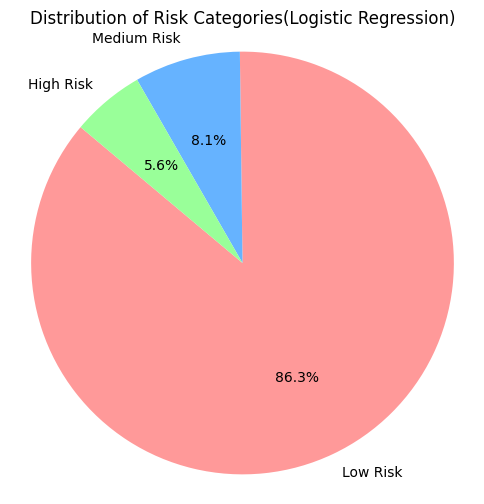

In [ ]:
# Plotting Pie chart Risk Category
plt.figure(figsize=(6, 6))
plt.pie(risk_category_counts, labels=risk_category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Risk Categories(Logistic Regression)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Penilaian Resiko Kredit dengan Random Forest**

In [ ]:
#Inisialisasi model Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi probabilitas pada data baru (X_test)
predictions = model.predict_proba(X_test)[:, 1]

In [ ]:
# Menambahkan kolom skor risiko pada dataset
X_test = pd.DataFrame(X_test)
X_test['risk_score'] = predictions

In [ ]:
# Menampilkan data yang sudah diprioritaskan
print(X_test.head())

          0         1         2         3         4         5         6  \
0  2.193827  1.623401  0.266987  1.399997  0.138807 -0.976953 -0.153171   
1 -0.400392  1.623401  1.644984 -0.552510  1.654577 -0.976953 -0.246299   
2  1.892174 -0.615991  0.188901  2.475133  0.138807 -0.976953  1.895652   
3  0.009856  1.623401  0.152154 -0.383286  0.138807 -0.976953 -0.134545   
4  0.082253 -0.615991 -1.131679  0.181590 -1.376964 -0.976953  0.219342   

          7         8         9  ...        11        12        13        14  \
0  1.164279  0.556644 -1.007141  ... -0.840034 -0.314221 -0.725656 -0.436501   
1  1.164279 -0.687906  0.888175  ...  1.367296 -0.314221 -0.149548  1.546564   
2  1.164279 -0.273056 -0.494756  ... -0.438701 -0.314221 -0.691924  1.115463   
3 -0.051598 -0.273056  0.059691  ...  0.163298 -0.314221 -0.158488  0.511922   
4  1.164279 -0.273056 -1.137149  ... -0.840034 -0.314221 -0.498808 -0.436501   

         15        16        17        18        19  risk_score  
0 

In [ ]:
# Mengelompokkan peminjam berdasarkan skor risiko
def risk_category(score):
    if score < 0.2:
        return 'Low Risk'
    elif 0.2 <= score < 0.5:
        return 'Medium Risk'
    else:
        return 'High Risk'

X_test['Risk Category'] = X_test['risk_score'].apply(risk_category)

# Menampilkan jumlah peminjam di setiap kategori risiko
risk_category_counts = X_test['Risk Category'].value_counts()
print(risk_category_counts)

Risk Category
Low Risk       81872
High Risk       7186
Medium Risk     4199
Name: count, dtype: int64


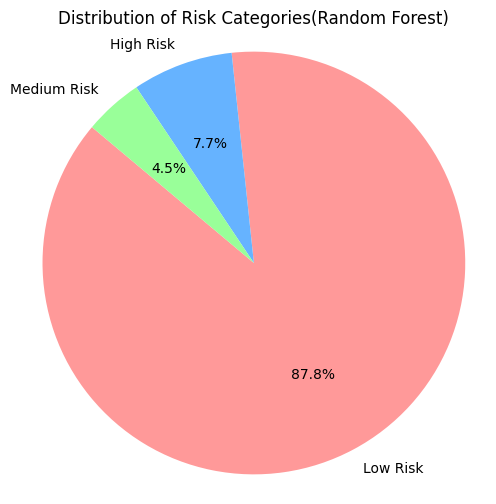

In [ ]:
# Plotting Pie chart Risk Category
plt.figure(figsize=(6, 6))
plt.pie(risk_category_counts, labels=risk_category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Risk Categories(Random Forest)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Kesimpulan**<br>
1. Semakin besar jumlah pinjaman, maka akan semakin besar pula grade resikonya karena mendapatkan suku bunga yang lebih tinggi sebagai kompensasi tambahan. Namun, terdapat anomali pada Grade B di mana ada pinjaman sangat besar dengan Grade/Risiko yang lebih kecil.<br>
2. Dari model logistic regression yang sudah coba di bangun,  di temukan bahwa  fitur yang paling berpengaruh terhadap resiko peminjaman adalah “Collection Recovery Fee” dan  “Installment”. Hal ini dikarenakan varibel tersebut berkaitan langsung  dengan jumlah yang harus di bayar oleh peminjam , baik sebagai biaya tambahan/denda karena gagal/telat bayar, maupun sebagai komponen utama dari  pembayaran pinjaman.*<br>
3. Dari 2 Model klasifikasi yang sudah bangun, yaitu Logistic Regression dan Random Forest. Yang memiliki performa terbaik didalam memprediksi credit Risk adalah Logistic regression karena memiliki metrik evalution Recall yang lebih tinggi setelah dilakukan oversampling dengan SMOTE terkait distribusi data  target yang imbalance.<br>
4. Berdasarkan hasil dari distribusi Risk category, maka dapat dilihat bahwa High risk dan Medium Risk lebih banyak di tangkap oleh Model machine Learning Logistic Regression dibandingkan dengan random Forest.<br>
5. Untuk mencegah atau mengurangi resiko pinjaman karena gagal bayar, sebaiknya perlu mengidentifikasi peminjam beresiko tinggi sejak awal dan mengambil Langkah-Langkah preventif, seperti penawaran program bantuan keuangan atau penyesuaian persyaratan pinjaman.<br>